# **Experiment 2: Logistic Regression**
To investigate the performance of the algorithm on convex problems, we
compare AMSGRAD with ADAM on logistic regression problem. We use MNIST dataset for this experiment, the classification is based on $784$ dimensional image vector to one of the $10$ class labels. The step size parameter αt is set to $\alpha_t=\alpha/\sqrt{t}$ for both ADAM and AMSGRAD in our experiments,
consistent with the theory. We use a minibatch version of these algorithms with minibatch size set to $128$. We can see that AMSGRAD performs better than ADAM.

Hyper-parameters: $\beta_1 = 0.9$,  $\beta_2 = 0.99$, $\alpha = 0.01$.

In [0]:
%tensorflow_version 1.x
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import np_utils
from keras import optimizers
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.core import Activation
import tensorflow as tf

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)


print(X_train.shape)
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Using TensorFlow backend.


(60000, 784)


In [0]:
# Fit the model
model = Sequential([
Dense(10, input_shape=(784,)),
Activation('softmax'),])

class SGDLearningRateTracker(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        optimizer = self.model.optimizer
        if epoch == 0:
          lr =  K.eval(self.model.optimizer.lr)
        else:
          lr =  K.eval(self.model.optimizer.lr) / (np.sqrt(epoch))
        self.model.optimizer.lr = tf.Variable(lr)
        print('LR: {:.6f}'.format(K.eval(self.model.optimizer.lr)))

# define your model

adamObj_f = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamObj_t = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

model.compile(loss='mse', optimizer=adamObj_f)
model.save_weights('model.h5')
history_f = model.fit(X_train, y_train, nb_epoch=500, batch_size = 128, callbacks=[SGDLearningRateTracker()])

model.load_weights('model.h5')
model.compile(loss='mse', optimizer=adamObj_t)
history_t = model.fit(X_train, y_train, nb_epoch=500, batch_size = 128, callbacks=[SGDLearningRateTracker()])


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Acc: %.2f%%" % (100-scores*100))













Epoch 1/500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


LR: 0.010000
60000/60000 [==============================] - 1s 17us/step - loss: 0.0158
Epoch 2/500
LR: 0.010000
60000/60000 [==============================] - 1s 15us/step - loss: 0.0121
Epoch 3/500
LR: 0.007071
60000/60000 [==============================] - 1s 15us/step - loss: 0.0115
Epoch 4/500
LR: 0.004082
60000/60000 [==============================] - 1s 15us/step - loss: 0.0111
Epoch 5/500
LR: 0.002041
60000/60000 [==============================] - 1s 15us/step - loss: 0.0109
Epoch 6/500
LR: 0.000913
60000/60000 [==============================] - 1s 15us/step - loss: 0.0107
Epoch 7/500
LR: 0.000373
60000/60000 [==============================] - 1s 15us/step - loss: 0.0105
Epoch 8/500
LR: 0.000141
60000/60000 [==============================] - 1s 15us/step - loss: 0.0104
Epoch 9/500
LR: 0.000050
60000/60000 [==============================] - 1s 15us/step - loss: 0.0105
Epoch 10/500
LR: 0.000017
60000/60000 [==============================] - 1s 15us/step - loss: 0.0103
Epoch 11/50

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/500
LR: 0.010000
60000/60000 [==============================] - 2s 30us/step - loss: 0.0159
Epoch 2/500
LR: 0.010000
60000/60000 [==============================] - 1s 23us/step - loss: 0.0121
Epoch 3/500
LR: 0.007071
60000/60000 [==============================] - 1s 22us/step - loss: 0.0115
Epoch 4/500
LR: 0.004082
60000/60000 [==============================] - 1s 23us/step - loss: 0.0112
Epoch 5/500
LR: 0.002041
60000/60000 [==============================] - 1s 22us/step - loss: 0.0109
Epoch 6/500
LR: 0.000913
60000/60000 [==============================] - 1s 22us/step - loss: 0.0108
Epoch 7/500
LR: 0.000373
60000/60000 [==============================] - 1s 22us/step - loss: 0.0105
Epoch 8/500
LR: 0.000141
60000/60000 [==============================] - 1s 22us/step - loss: 0.0104
Epoch 9/500
LR: 0.000050
60000/60000 [==============================] - 1s 22us/step - loss: 0.0103
Epoch 10/500
LR: 0.000017
60000/60000 [==============================] - 1s 22us/step - loss: 0.0101

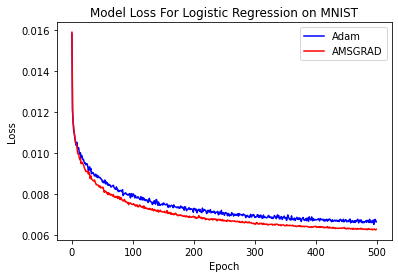

In [0]:
import matplotlib.pyplot as plt

plt.plot(history_f.history['loss'],label='Adam',color=(0,0,1))
plt.plot(history_t.history['loss'],label='AMSGRAD', color=(1,0,0))

plt.title('Model Loss For Logistic Regression on MNIST')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# **Experiment 3: Neural Networks**

Similar to the previous experiment, but we add a fully connected 100 rectified
linear units (ReLU) as the hidden layer for this experiment (feedforward neural
network). Furthermore, we use constant $\alpha_t = \alpha$ throughout all our experiments on neural networks. AMSGRAD performs exceptionally better than ADAM.


Hyper-parameters: $\beta_1 = 0.9$,  $\beta_2 = 0.99$, $\alpha = 0.01$

In [0]:
# Fit the model
model = Sequential([
Dense(100, input_shape=(784,)),
Activation('relu'),
Dense(10),
Activation('softmax'),])

# define our model

adamObj_t = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
adamObj_f = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mse', optimizer=adamObj_t)
model.save_weights('model.h5')
history_t_nn = model.fit(X_train, y_train, nb_epoch=500, batch_size = 128)

model.load_weights('model.h5')
model.compile(loss='mse', optimizer=adamObj_f)
history_f_nn = model.fit(X_train, y_train, nb_epoch=500, batch_size = 128)


# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print(" Acc: %.2f%%" % (100-scores*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/500
60000/60000 [==============================] - 3s 47us/step - loss: 0.0119
Epoch 2/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0068
Epoch 3/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0063
Epoch 4/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0062
Epoch 5/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0056
Epoch 6/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0055
Epoch 7/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0055
Epoch 8/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0053
Epoch 9/500
60000/60000 [==============================] - 2s 35us/step - loss: 0.0049
Epoch 10/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0050
Epoch 11/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0050
Epoch 12/500
60000/60000 [===============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/500
60000/60000 [==============================] - 3s 48us/step - loss: 0.0117
Epoch 2/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0069
Epoch 3/500
60000/60000 [==============================] - 2s 35us/step - loss: 0.0066
Epoch 4/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0058
Epoch 5/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0057
Epoch 6/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0058
Epoch 7/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0052
Epoch 8/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0056
Epoch 9/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0055
Epoch 10/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0057
Epoch 11/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.0053
Epoch 12/500
60000/60000 [===============

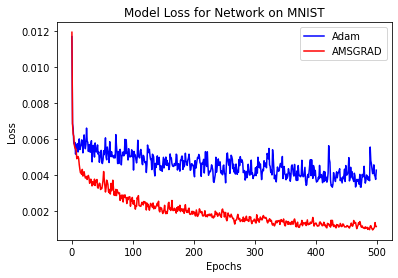

In [0]:
import matplotlib.pyplot as plt

plt.plot(history_f_nn.history['loss'],label='Adam',color=(0,0,1))
plt.plot(history_t_nn.history['loss'],label='AMSGRAD',color=(1,0,0))

plt.title('Model Loss for Network on MNIST')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()